In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import pathlib
from keras import Sequential

In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install tensorflow

## Load Data

In [3]:
fake = "/Users/apple/Desktop/Real-and-Fake-Face-Detection/archive/real_and_fake_face/training_fake"
real = "/Users/apple/Desktop/Real-and-Fake-Face-Detection/archive/real_and_fake_face/training_real"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

## Load Image

In [4]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

In [5]:
%matplotlib inline

### take a glance at our real and fake image data

In [6]:
print("real_path is a",type(real_path)," with",len(real_path),"images")
print("fake_path is a",type(fake_path)," with",len(fake_path),"images")

real_path is a <class 'list'>  with 1081 images
fake_path is a <class 'list'>  with 960 images


### access image with directory

In [7]:
# access image
print(real_path[0])
print(real+"/"+real_path[0])

real_00251.jpg
/Users/apple/Desktop/Real-and-Fake-Face-Detection/archive/real_and_fake_face/training_real/real_00251.jpg


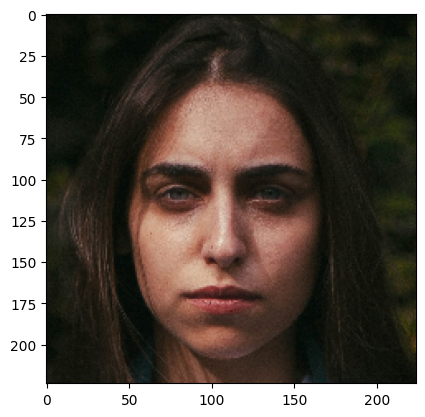

In [8]:
plt.imshow(load_img(real+"/"+real_path[0]))

### Display some Real and Fake faces

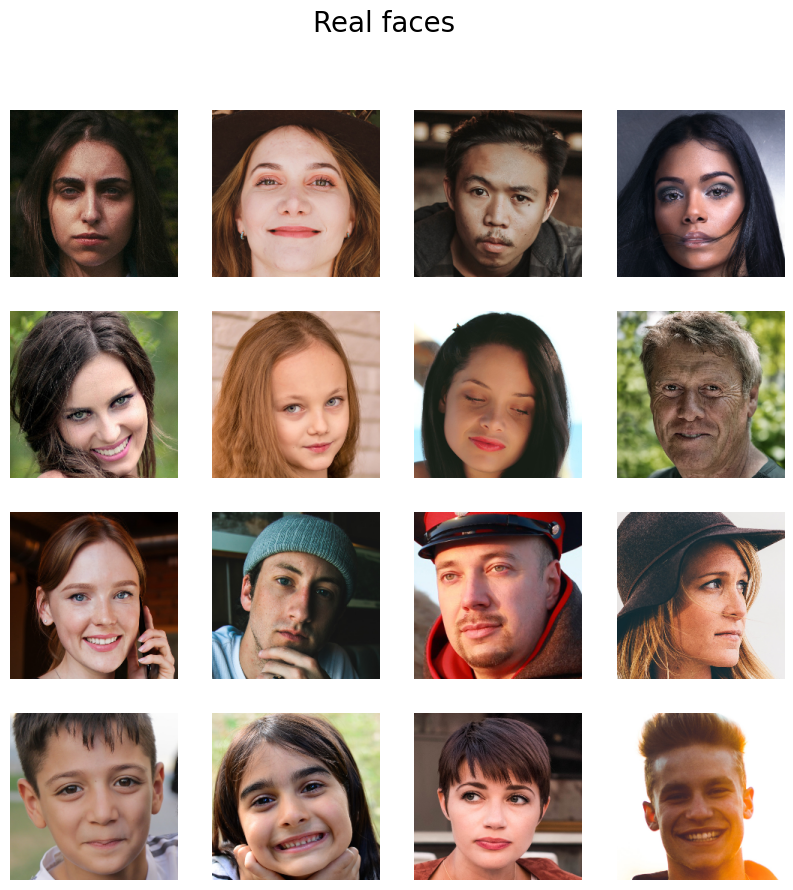

In [9]:
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real +"/"+ real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

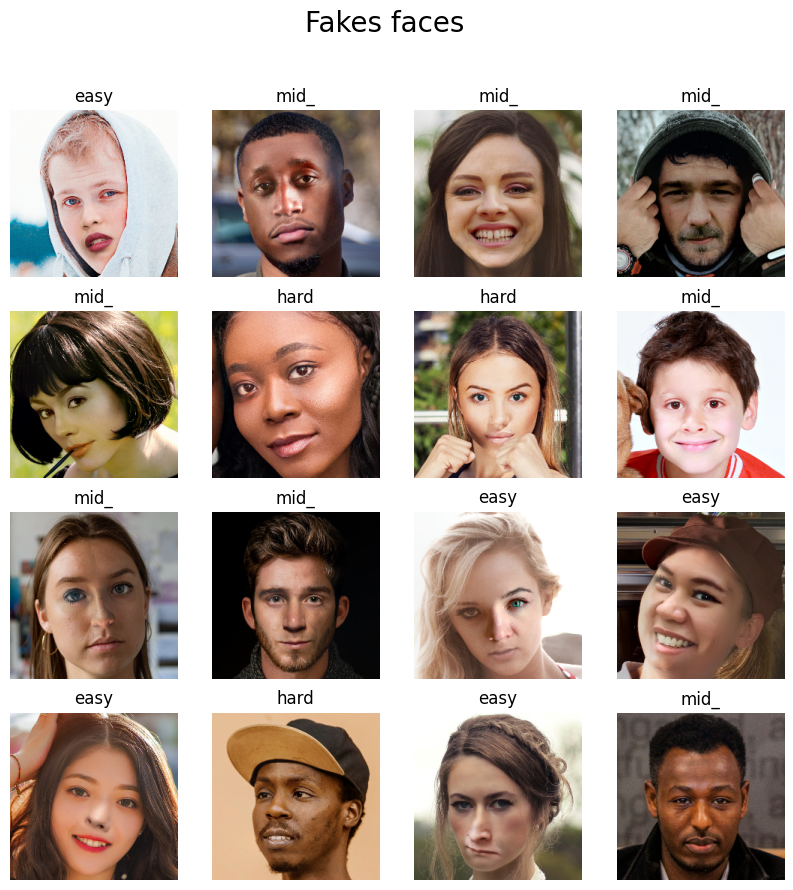

In [10]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake +"/"+ fake_path[i]), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:4])
    plt.axis('off')

plt.show()

### create train, validation and test data set

In [11]:
for i in range(5):
    print(real_path[i])
for i in range(5):
    print(fake_path[i])

real_00251.jpg
real_00537.jpg
real_00523.jpg
real_00245.jpg
real_00279.jpg
easy_143_0011.jpg
mid_329_1110.jpg
mid_257_1111.jpg
mid_40_1111.jpg
mid_41_1111.jpg


In [15]:
dataset_path = "/Users/apple/Desktop/Real-and-Fake-Face-Detection/archive/real_and_fake_face"

### Data Preprocessing

In [13]:
data_with_aug = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)
# 20% 

In [22]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(180, 180),
                                          batch_size=32,
                                          subset="training")

Found 1633 images belonging to 2 classes.


In [25]:
val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(180, 180),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 408 images belonging to 2 classes.


(array([[[[0.6117647 , 0.7019608 , 0.38823533],
          [0.60784316, 0.7019608 , 0.37254903],
          [0.6117647 , 0.69803923, 0.3647059 ],
          ...,
          [0.58431375, 0.8117648 , 0.47058827],
          [0.58431375, 0.8117648 , 0.47058827],
          [0.5882353 , 0.81568635, 0.48235297]],
 
         [[0.5803922 , 0.6862745 , 0.37647063],
          [0.58431375, 0.6901961 , 0.37254903],
          [0.5568628 , 0.67058825, 0.34901962],
          ...,
          [0.5803922 , 0.8078432 , 0.47450984],
          [0.58431375, 0.8000001 , 0.47058827],
          [0.57254905, 0.8000001 , 0.4666667 ]],
 
         [[0.5529412 , 0.6745098 , 0.37647063],
          [0.5529412 , 0.6745098 , 0.36862746],
          [0.54509807, 0.67058825, 0.34509805],
          ...,
          [0.5686275 , 0.7960785 , 0.46274513],
          [0.5764706 , 0.79215693, 0.4666667 ],
          [0.56078434, 0.7843138 , 0.4666667 ]],
 
         ...,
 
         [[0.5254902 , 0.5921569 , 0.28627452],
          [0.25098

In [34]:
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape = (180, 180, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)       73856 

In [56]:
model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [57]:
history = model.fit(
    train,
    epochs = 30,
    validation_data = val,
    callbacks = callbacks)

Epoch 1/30
52/52 [==============================] - 35s 668ms/step - loss: 0.7143 - accuracy: 0.5217 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 2/30
52/52 [==============================] - 34s 658ms/step - loss: 0.6936 - accuracy: 0.5352 - val_loss: 0.6921 - val_accuracy: 0.5294
Epoch 3/30
52/52 [==============================] - 34s 658ms/step - loss: 0.6947 - accuracy: 0.5818 - val_loss: 0.6931 - val_accuracy: 0.5662
Epoch 4/30
52/52 [==============================] - 34s 658ms/step - loss: 0.6673 - accuracy: 0.6001 - val_loss: 0.7015 - val_accuracy: 0.5539
Epoch 5/30
52/52 [==============================] - 34s 656ms/step - loss: 0.6691 - accuracy: 0.6185 - val_loss: 0.7024 - val_accuracy: 0.5515
Epoch 6/30
52/52 [==============================] - 34s 658ms/step - loss: 0.6589 - accuracy: 0.6252 - val_loss: 0.7292 - val_accuracy: 0.5319
Epoch 7/30
52/52 [==============================] - 34s 659ms/step - loss: 0.6327 - accuracy: 0.6558 - val_loss: 0.7724 - val_accuracy: 0.5588

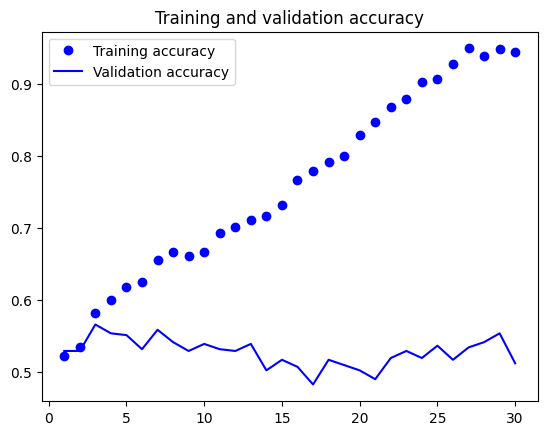

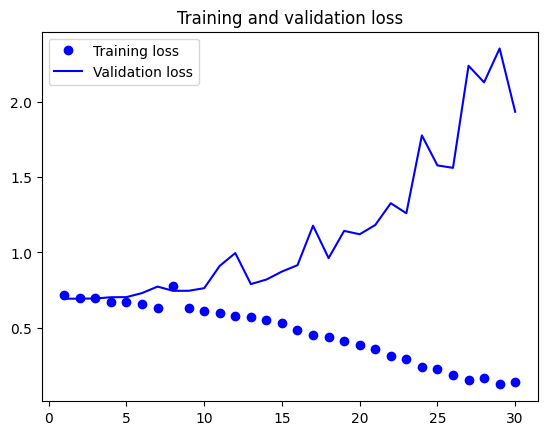

In [59]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [60]:
# data augmentation layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,_ in train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 1000x1000 with 0 Axes>

tuple